 ## Guía de Trabajos Prácticos

# **Librerías**

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
import imutils
from ipywidgets import interact, IntSlider, FloatSlider, RadioButtons, Checkbox

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio 1:** Erosión y dilatación

1. Construya elementos estructurantes (EE) y una imágen.

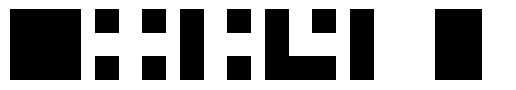

In [ ]:
EE1 = np.ones((3,3)).astype(np.uint8)

EE2 = np.ones((3,3)).astype(np.uint8)
EE2[0,0] = 0
EE2[0,2] = 0
EE2[2,0] = 0
EE2[2,2] = 0

EE3 = np.copy(EE2)
EE3[1,0] = 0

EE4 = np.copy(EE3)
EE4[2,1] = 0

EE5 = np.ones((3,3)).astype(np.uint8)
EE5[:,0] = 0

EE6 = EE5.copy()
EE6[:,1] = 0

fig, ax = plt.subplots(1,6)
ax[0].imshow(EE1,cmap='gray')
ax[0].axis('off')
ax[1].imshow(EE2,cmap='gray')
ax[1].axis('off')
ax[2].imshow(EE3,cmap='gray')
ax[2].axis('off')
ax[3].imshow(EE4,cmap='gray')
ax[3].axis('off')
ax[4].imshow(EE5,cmap='gray')
ax[4].axis('off')
ax[5].imshow(EE6,cmap='gray')
ax[5].axis('off')
plt.show()

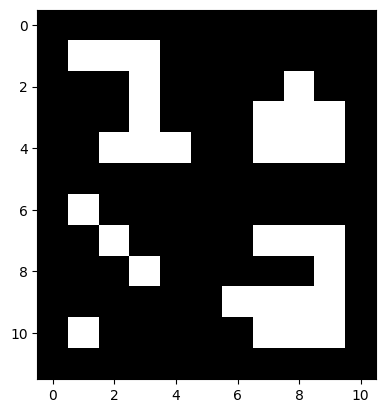

In [ ]:
img = np.zeros((12,11))
img[1,1:4]=255
img[2,3]=255
img[2,8]=255
img[3,3]=255
img[3,7:10]=255
img[4,2:5]=255
img[4,7:10]=255
img[6,1]=255
img[7,2]=255
img[7,7:10]=255
img[8,3]=255
img[8,9]=255
img[9,6:10]=255
img[10,1]=255
img[10,1]=255
img[10,7:10]=255
plt.imshow(img,cmap='gray')
plt.show()


In [ ]:
def ruido_impulsivo(image, salt_prob=0.01, pepper_prob=0.01):
    noise_image = image.copy()
    probs = np.random.random(noise_image.shape[:2])
    noise_image[probs < salt_prob] = 255
    noise_image[probs > 1 - pepper_prob] = 0
    return np.uint8(noise_image)

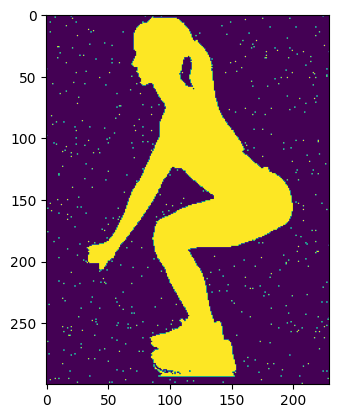

In [ ]:
imagen = cv.imread("drive/MyDrive/PDI/Cuerpos.jpg", cv.IMREAD_GRAYSCALE)
imagen = imagen[:,670:]
_, img = cv.threshold(imagen, 220, 255, cv.THRESH_BINARY_INV)

# ruido sal y pimienta
img = ruido_impulsivo(img,0.01,0.0)

plt.imshow(img)
plt.show()

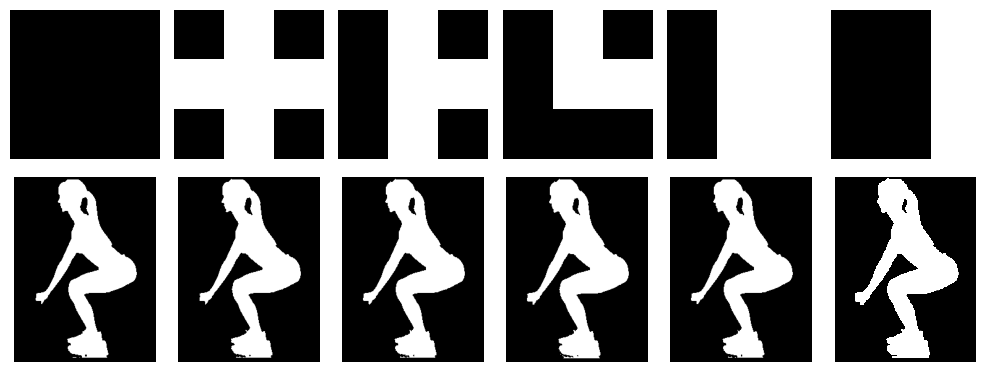

In [ ]:
dst1 = cv.erode(img,EE1)
dst2 = cv.erode(img,EE2)
dst3 = cv.erode(img,EE3)
dst4 = cv.erode(img,EE4)
dst5 = cv.erode(img,EE5)
dst6 = cv.erode(img,EE6)

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(10,4))

ax[0,0].imshow(EE1,cmap='gray')
ax[0,1].imshow(EE2,cmap='gray')
ax[0,2].imshow(EE3,cmap='gray')
ax[0,3].imshow(EE4,cmap='gray')
ax[0,4].imshow(EE5,cmap='gray')
ax[0,5].imshow(EE6,cmap='gray')

ax[1,0].imshow(dst1,cmap='gray')
ax[1,1].imshow(dst2,cmap='gray')
ax[1,2].imshow(dst3,cmap='gray')
ax[1,3].imshow(dst4,cmap='gray')
ax[1,4].imshow(dst5,cmap='gray')
ax[1,5].imshow(dst6,cmap='gray',vmin=0,vmax=1)

for i in range(2):
  for j in range(6):
    ax[i,j].axis('off')

plt.tight_layout()
plt.show()

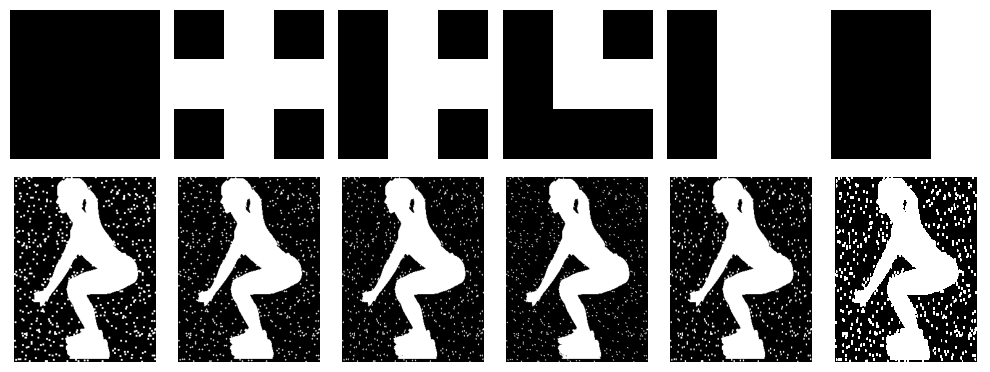

In [ ]:
dst1 = cv.dilate(img,EE1)
dst2 = cv.dilate(img,EE2)
dst3 = cv.dilate(img,EE3)
dst4 = cv.dilate(img,EE4)
dst5 = cv.dilate(img,EE5)
dst6 = cv.dilate(img,EE6)

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(10,4))

ax[0,0].imshow(EE1,cmap='gray')
ax[0,1].imshow(EE2,cmap='gray')
ax[0,2].imshow(EE3,cmap='gray')
ax[0,3].imshow(EE4,cmap='gray')
ax[0,4].imshow(EE5,cmap='gray')
ax[0,5].imshow(EE6,cmap='gray')

ax[1,0].imshow(dst1,cmap='gray')
ax[1,1].imshow(dst2,cmap='gray')
ax[1,2].imshow(dst3,cmap='gray')
ax[1,3].imshow(dst4,cmap='gray')
ax[1,4].imshow(dst5,cmap='gray')
ax[1,5].imshow(dst6,cmap='gray',vmin=0,vmax=1)

for i in range(2):
  for j in range(6):
    ax[i,j].axis('off')

plt.tight_layout()
plt.show()

**2.** Utilizando la imagen fosforos.jpg, extraiga en una imagen los fósforos que están verticales y en otra los horizontales.

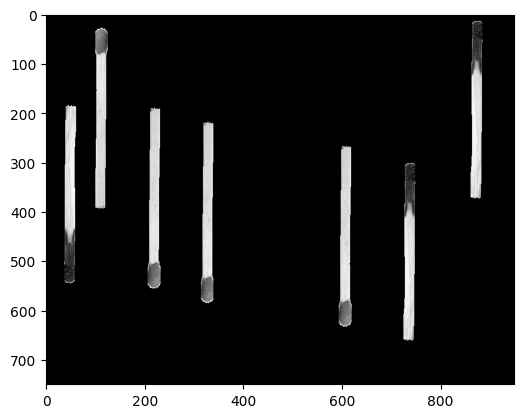

In [ ]:
fosforos = cv.imread("drive/MyDrive/PDI/fosforos.jpg",cv.IMREAD_GRAYSCALE)

EE_vertical = np.ones((35,1)).astype(np.uint8)  # kernel vertical (linea, voy probando el largo)
_, binary = cv.threshold(fosforos, 250, 255, cv.THRESH_BINARY_INV)
fosforos_erode = cv.erode(binary,EE_vertical) # erosión para quitar los fósforos horizontales y quedarme con los verticales
fosforos_dilate = cv.dilate(fosforos_erode,EE_vertical) # vuelvo al área original

fosforos_verticales = cv.bitwise_and(fosforos,fosforos,mask=fosforos_dilate)
plt.imshow(fosforos_verticales,cmap='gray')
plt.show()

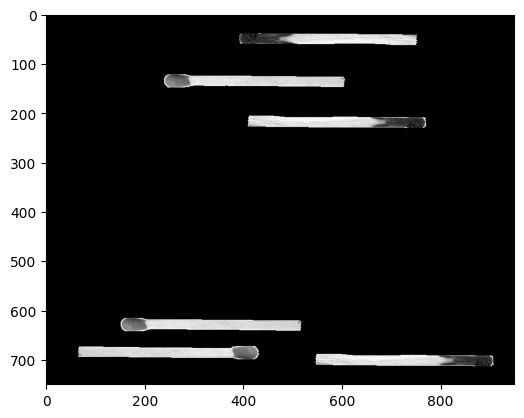

In [ ]:
fosforos = cv.imread("drive/MyDrive/PDI/fosforos.jpg",cv.IMREAD_GRAYSCALE)

EE_horizontal = np.ones((1,35)).astype(np.uint8)  # kernel horizontal (linea, voy probando el largo)
_, binary = cv.threshold(fosforos, 250, 255, cv.THRESH_BINARY_INV)
fosforos_erode = cv.erode(binary,EE_horizontal) # erosión para quitar los fósforos verticales y quedarme con los horizontales
fosforos_dilate = cv.dilate(fosforos_erode,EE_horizontal) # vuelvo al área original

fosforos_horizontales = cv.bitwise_and(fosforos,fosforos,mask=fosforos_dilate)
plt.imshow(fosforos_horizontales,cmap='gray')
plt.show()

**3.** Implemente una secuencia de operaciones (incluyendo operaciones aritméticas
y lógicas), con diferentes EE, que le permitan extraer el logo de la imagen
createch01.png. En principio, ignore las letras pero (opcionalmente) si se le
ocurre como quitarlas de forma automática, hágalo.
Pista: extraer el logo por partes y combinarlas en una imagen final.


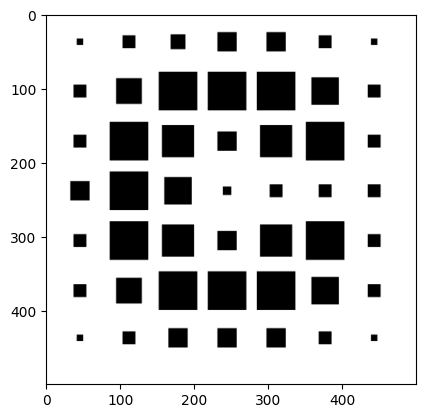

In [ ]:
logo = cv.imread("drive/MyDrive/PDI/createch01.png",cv.IMREAD_GRAYSCALE)
logo = logo[0:500,250:750]
plt.imshow(logo,cmap='gray')
plt.show()

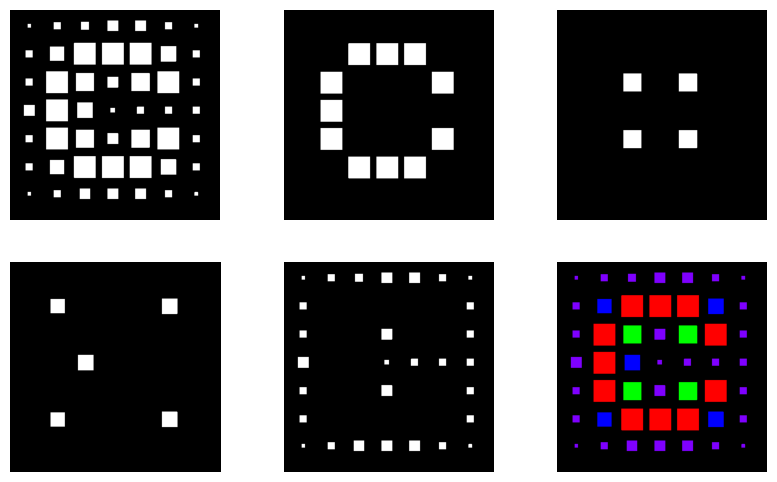

In [ ]:
_, binary = cv.threshold(logo, 125, 255, cv.THRESH_BINARY_INV)
EE = np.ones((50,50)).astype(np.uint8)  # con kernel grande extraemos los cuadrados grandes
E1 = cv.erode(binary,EE)    # con erosión me deshago de los cuadrados chiquitos
E1 = cv.dilate(E1,EE)       # vuelve los cuadrados que quedaron a su área original

mask = cv.bitwise_not(E1)
img2 = cv.bitwise_and(binary,binary,mask=mask)  # obtengo el resto de la imagen que no segmenté antes (cuadrados chiquitos)

EE = np.ones((40,40)).astype(np.uint8) # disminuyo el kernel y obtengo cuadrados un poco más chicos
E2 = cv.erode(img2,EE)  # con erosión con kernel cuadrado me deshago de los cuadrados muymuy chiquitos
E2 = cv.dilate(E2,EE)   # vuelve los cuadrados a su área original

mask = cv.bitwise_not(E2)
img3 = cv.bitwise_and(img2,img2,mask=mask)  # obtengo el resto de la imagen que no segmenté antes (cuadrados chiquitos)

EE = np.ones((30,30)).astype(np.uint8) # disminuyo el kernel y obtengo cuadrados un poco más chicos
E3 = cv.erode(img3,EE)  # con erosión con kernel cuadrado me deshago de los cuadrados muymuy chiquitos
E3 = cv.dilate(E3,EE)   # vuelve los cuadrados a su área original

mask = cv.bitwise_not(E3)
img4 = cv.bitwise_and(img3,img3,mask=mask)  # obtengo el resto de la imagen que no segmenté antes (cuadrados chiquitos)

EE = np.ones((5,5)).astype(np.uint8) # disminuyo el kernel y obtengo cuadrados un poco más chicos
E4 = cv.erode(img4,EE)  # con erosión con kernel cuadrado me deshago de los cuadrados muymuy chiquitos
E4 = cv.dilate(E4,EE)   # vuelve los cuadrados a su área original

# podría seguir y hacer para cada tamaño de cuadradito pero paro acá

# esto es para plotearlos de distintos colores a los EX
img_total = np.zeros((logo.shape[0], logo.shape[1], 3), dtype=np.uint8)
img_total[E1 == 255] = [255,0,0]
img_total[E2 == 255] = [0,255,0]
img_total[E3 == 255] = [0,0,255]
img_total[E4 == 255] = [127,0,255]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
ax[0,0].imshow(binary,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(E1,cmap='gray')
ax[0,1].axis('off')
ax[0,2].imshow(E2,cmap='gray')
ax[0,2].axis('off')
ax[1,0].imshow(E3,cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(E4,cmap='gray')
ax[1,1].axis('off')
ax[1,2].imshow(img_total)
ax[1,2].axis('off')
plt.show()

## **Ejercicio 2:** Operaciones de apertura y cierre

Realice las operaciones de apertura y cierre sobre la imagen generada utilizando el EE de 3x3 con todos 1s.
Utilice otros EE, pueden ser los que definió antes, y vuelva a realizar las
operaciones. Comente los resultados.
¿Estas operaciones le parecen útiles para los ejercicios 1.2 y 1.3?
¿Se anima a utilizarlos y probar su funcionamiento?


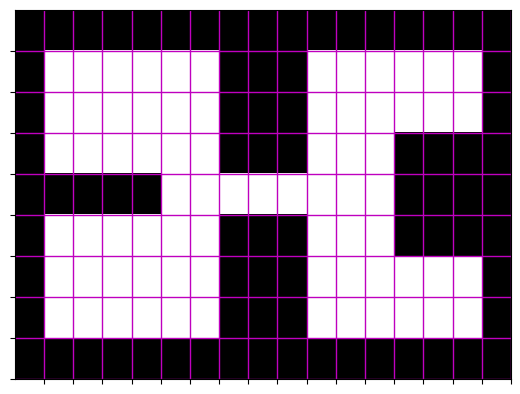

In [ ]:
img = np.zeros((9,17)).astype(np.uint8)
img[1:4,1:7] = 255
img[1:3,10:16] = 255
img[5:8,1:7] = 255
img[6:8,10:16] = 255
img[4,5:13] = 255
img[3:6,10:13] = 255

fig,ax = plt.subplots()
ax.imshow(img,cmap='gray',aspect='auto')
ax.set_xticks(np.arange(0.5, img.shape[1], 1))
ax.set_yticks(np.arange(0.5, img.shape[0], 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='m', linestyle='-', linewidth=1)
plt.show()

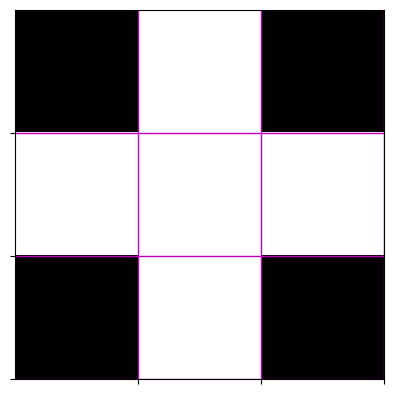

In [ ]:
EE = np.ones((3,3)).astype(np.uint8)  # kernel sugerido en este ejercicio (todos unos)
EE = EE2 # para probar los definidos en el primer ejercicio vamos cambiando este nombre

fig,ax = plt.subplots()
ax.imshow(EE,cmap='gray')
ax.set_xticks(np.arange(0.5, EE.shape[1], 1))
ax.set_yticks(np.arange(0.5, EE.shape[0], 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='m', linestyle='-', linewidth=1)
plt.show()

**APERTURA** (EROSIÓN -> DILATACIÓN)

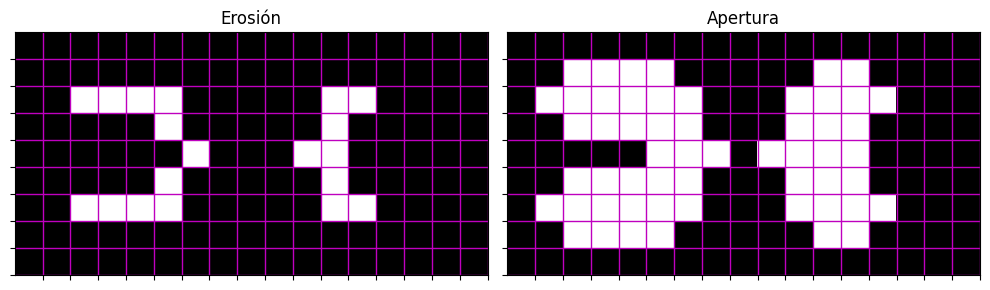

In [ ]:
erosion = cv.erode(img,EE)
apertura = cv.dilate(erosion,EE)

fig,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(erosion,cmap='gray',aspect='auto')
ax[0].set_xticks(np.arange(0.5, erosion.shape[1], 1))
ax[0].set_yticks(np.arange(0.5, erosion.shape[0], 1))
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title('Erosión')
ax[0].grid(True, color='m', linestyle='-', linewidth=1)

ax[1].imshow(apertura,cmap='gray',aspect='auto')
ax[1].set_xticks(np.arange(0.5, apertura.shape[1], 1))
ax[1].set_yticks(np.arange(0.5, apertura.shape[0], 1))
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Apertura')
ax[1].grid(True, color='m', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

**CIERRE** (DILATACIÓN -> EROSIÓN)

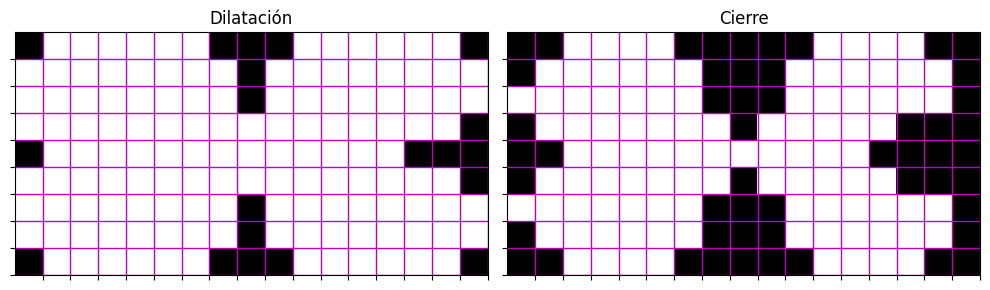

In [ ]:
dilatacion = cv.dilate(img,EE)
cierre = cv.erode(dilatacion,EE)

fig,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].imshow(dilatacion,cmap='gray',aspect='auto')
ax[0].set_xticks(np.arange(0.5, dilatacion.shape[1], 1))
ax[0].set_yticks(np.arange(0.5, dilatacion.shape[0], 1))
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title('Dilatación')
ax[0].grid(True, color='m', linestyle='-', linewidth=1)

ax[1].imshow(cierre,cmap='gray',aspect='auto')
ax[1].set_xticks(np.arange(0.5, cierre.shape[1], 1))
ax[1].set_yticks(np.arange(0.5, cierre.shape[0], 1))
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Cierre')
ax[1].grid(True, color='m', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

**2.** Extraiga de la imagen estrellas.jpg sólo las estrellas que se observan de mayor tamaño.

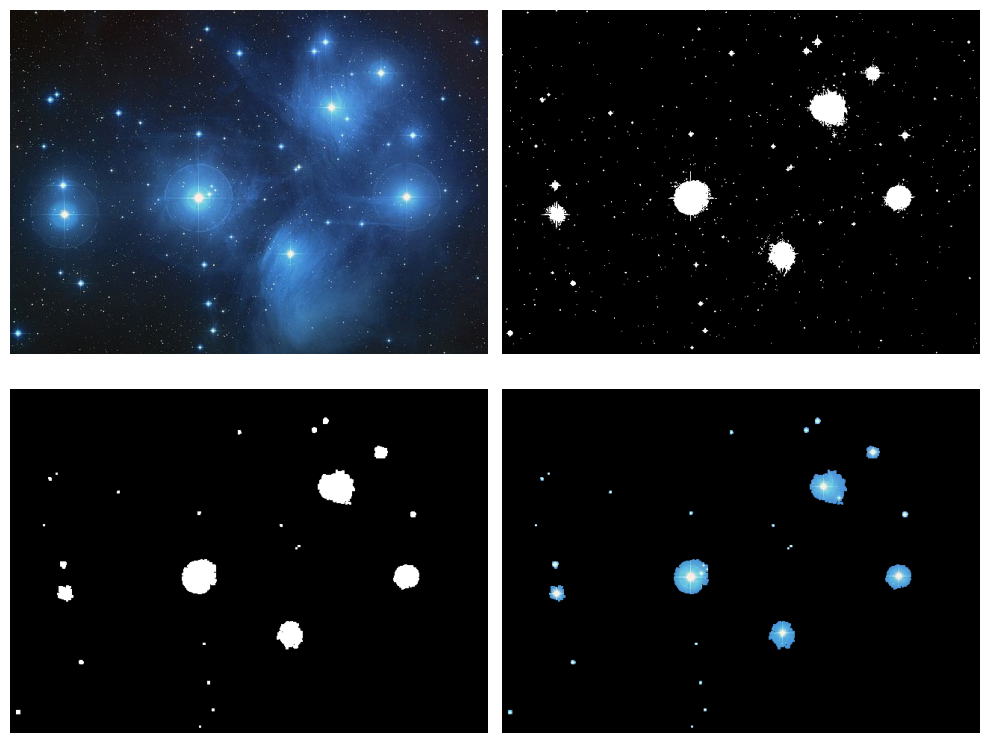

In [ ]:
estrellas = cv.imread("drive/MyDrive/PDI/estrellas.jpg")
estrellas_gris = cv.cvtColor(estrellas,cv.COLOR_BGR2GRAY).astype(np.uint8)
_,estrellas_binario = cv.threshold(estrellas_gris,130,255,cv.THRESH_BINARY)

EE = np.ones((3,3)).astype(np.uint8)
erosion = cv.erode(estrellas_binario,EE)  # con erosión primero (ajustando kernel a gusto) me deshago de las pequeñitas
apertura = cv.dilate(erosion,EE)          # con dilatación vuelvo al tamaño original de las estrellas
estrellas_masked = cv.bitwise_and(estrellas,estrellas,mask=apertura)    # maskeo con lo que obtuve para tener estrellas en la img original

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0,0].imshow(estrellas[:,:,[2,1,0]],cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(estrellas_binario,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(apertura,cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(estrellas_masked[:,:,[2,1,0]])
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

**3.** Diseñe un EE que le permita extraer la estrella fugaz de la imagen lluviaEstrellas.jpg.

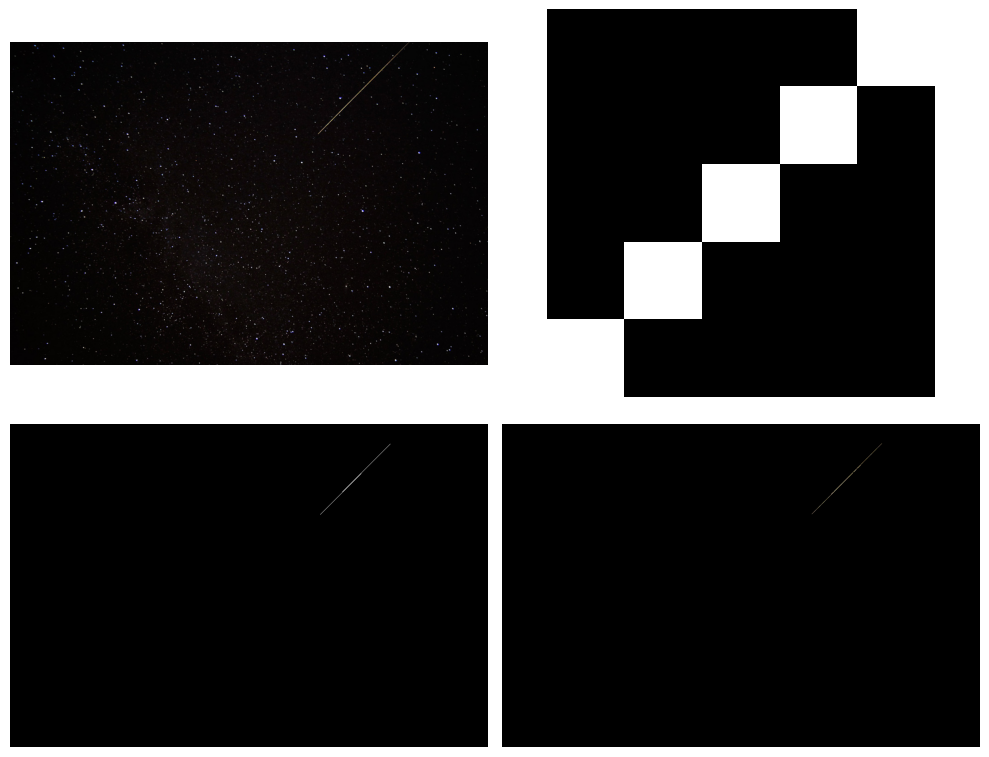

In [ ]:
lluviaEstrellas = cv.imread("drive/MyDrive/PDI/lluviaEstrellas.jpg")
lluviaEstrellas_gris = cv.cvtColor(lluviaEstrellas,cv.COLOR_BGR2GRAY).astype(np.uint8)
_,lluviaEstrellas_binario = cv.threshold(lluviaEstrellas_gris,130,255,cv.THRESH_BINARY)

EE = np.zeros((5,5)).astype(np.uint8)
for i in range(EE.shape[0]):  # pruebo con distintos tamaños de kernel (n,n)
  EE[i,EE.shape[0]-1-i] = 255 # hago la diagonal

# hago apertura para deshacerme de las estrellas chiquitas con erosión y volver al tamaño original de la fugaz con dilatación
# uso la función morphologyEx con cv.MORPH_OPEN para eso, después le aplico la máscara resultante a la imagen original a color y tengo la estrella.
lluviaEstrellas_apertura = cv.morphologyEx(lluviaEstrellas_binario,cv.MORPH_OPEN,EE)
lluviaEstrellas_masked = cv.bitwise_and(lluviaEstrellas,lluviaEstrellas,mask=lluviaEstrellas_apertura)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0,0].imshow(lluviaEstrellas[:,:,[2,1,0]],cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(EE,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(lluviaEstrellas_apertura,cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(lluviaEstrellas_masked[:,:,[2,1,0]])
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

## **Ejercicio 3:** Gradiente morfológico

**1.** Utilice el gradiente morfológico para obtener los bordes de las imágenes
fosforos.jpg y createch01.png.


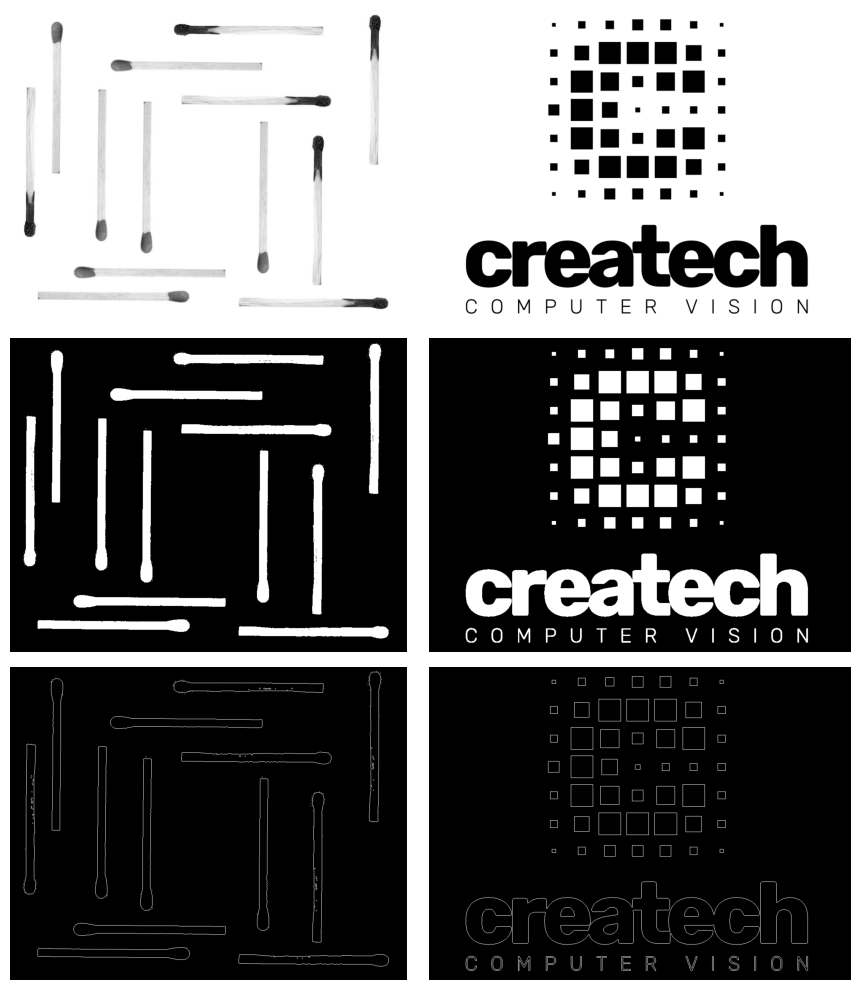

In [ ]:
fosforos = cv.imread('drive/MyDrive/PDI/fosforos.jpg', cv.IMREAD_GRAYSCALE)
createch = cv.imread("drive/MyDrive/PDI/createch01.png", cv.IMREAD_GRAYSCALE)

_,fosforos_binario = cv.threshold(fosforos,245,255,cv.THRESH_BINARY_INV)
_,createch_binario = cv.threshold(createch,245,255,cv.THRESH_BINARY_INV)

ee_cross = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
bordes_fosforos = fosforos_binario - cv.erode(fosforos_binario,ee_cross)
bordes_createch = createch_binario - cv.erode(createch_binario,ee_cross)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
ax[0,0].imshow(fosforos,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(createch,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(fosforos_binario,cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(createch_binario,cmap='gray')
ax[1,1].axis('off')
ax[2,0].imshow(bordes_fosforos,cmap="gray")
ax[2,0].axis('off')
ax[2,1].imshow(bordes_createch,cmap='gray')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()


**2.** Compare los resultados con la aplicación de los detectores de Sobel y Canny.


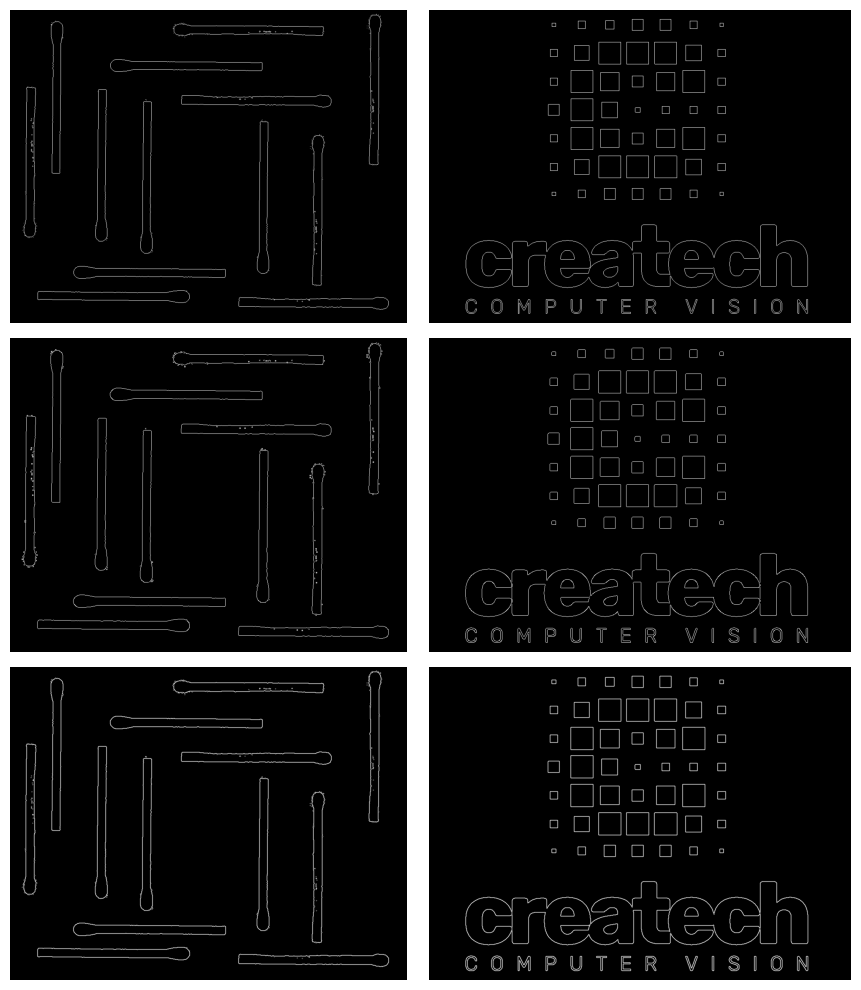

In [ ]:
canny_fosforos = cv.Canny(fosforos_binario,100,180)
canny_createch = cv.Canny(createch_binario,100,180)

sobelx = cv.Sobel(fosforos_binario, cv.CV_64F, 1, 0, ksize=1)
sobely = cv.Sobel(fosforos_binario, cv.CV_64F, 0, 1, ksize=1)
sobel_fosforos = cv.magnitude(sobelx, sobely)

sobelx = cv.Sobel(createch_binario, cv.CV_64F, 1, 0, ksize=1)
sobely = cv.Sobel(createch_binario, cv.CV_64F, 0, 1, ksize=1)
sobel_createch = cv.magnitude(sobelx, sobely)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
ax[0,0].imshow(bordes_fosforos,cmap="gray")
ax[0,0].axis('off')
ax[0,1].imshow(bordes_createch,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(canny_fosforos,cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(canny_createch,cmap='gray')
ax[1,1].axis('off')
ax[2,0].imshow(sobel_fosforos,cmap="gray")
ax[2,0].axis('off')
ax[2,1].imshow(sobel_createch,cmap='gray')
ax[2,1].axis('off')
plt.tight_layout()
plt.show()

Con Canny los bordes de las letras se ven peorl Los bordes de los cuadrados más chiquitos un poco también. Aparecne más artefactos en los fósforos aunque de manera similar.
Con Sobel queda bastante bien pero los bordes son un poco más gruesos que con los otros dos métodos.

**3.** Agregue ruido sal y pimienta a las imágenes, vuelva a aplicar los 3 métodos
y compare resultados.

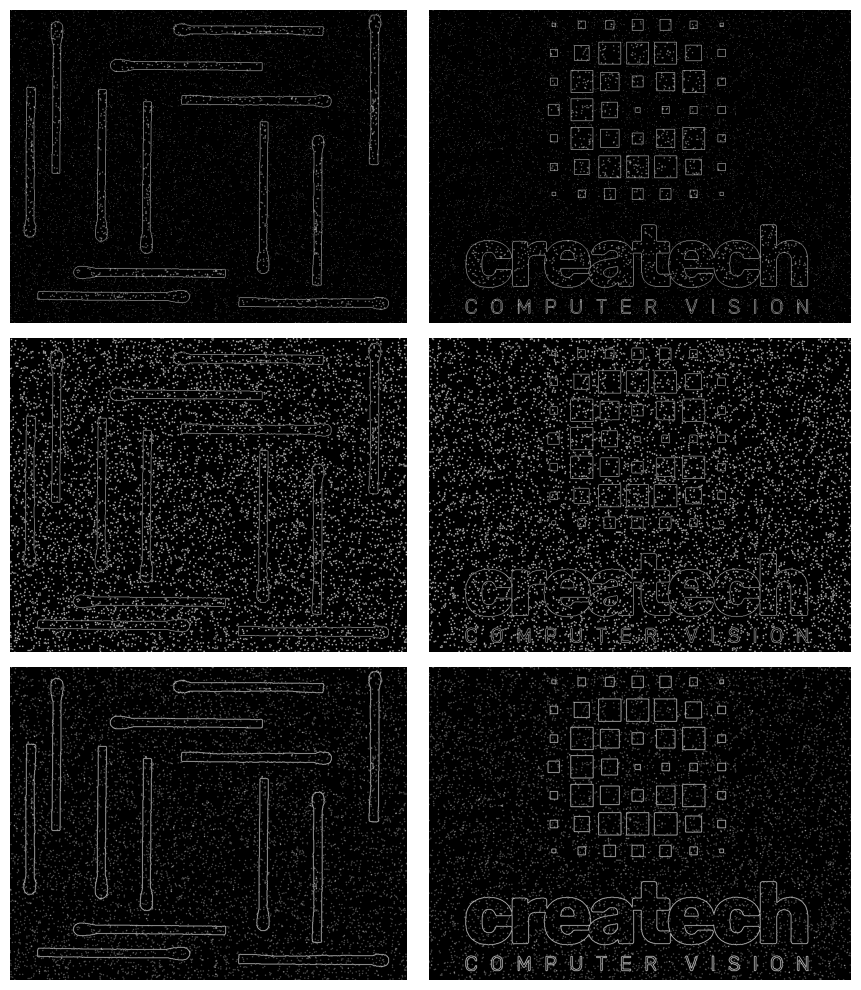

In [ ]:
fosforos_ruido = ruido_impulsivo(fosforos, salt_prob=0.01, pepper_prob=0.01)
createch_ruido = ruido_impulsivo(createch, salt_prob=0.01, pepper_prob=0.01)

_,fosforos_binario = cv.threshold(fosforos_ruido,245,255,cv.THRESH_BINARY_INV)
_,createch_binario = cv.threshold(createch_ruido,245,255,cv.THRESH_BINARY_INV)

ee_cross = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
bordes_fosforos = fosforos_binario - cv.erode(fosforos_binario,ee_cross)
bordes_createch = createch_binario - cv.erode(createch_binario,ee_cross)

canny_fosforos = cv.Canny(fosforos_binario,40,50)
canny_createch = cv.Canny(createch_binario,40,50)

sobelx = cv.Sobel(fosforos_binario, cv.CV_64F, 1, 0, ksize=1)
sobely = cv.Sobel(fosforos_binario, cv.CV_64F, 0, 1, ksize=1)
sobel_fosforos = cv.magnitude(sobelx, sobely)

sobelx = cv.Sobel(createch_binario, cv.CV_64F, 1, 0, ksize=1)
sobely = cv.Sobel(createch_binario, cv.CV_64F, 0, 1, ksize=1)
sobel_createch = cv.magnitude(sobelx, sobely)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
ax[0,0].imshow(bordes_fosforos,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(bordes_createch,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(canny_fosforos,cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(canny_createch,cmap='gray')
ax[1,1].axis('off')
ax[2,0].imshow(sobel_fosforos,cmap="gray")
ax[2,0].axis('off')
ax[2,1].imshow(sobel_createch,cmap='gray')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

El método por gradiente morfológico es el mejor para el ruido de sal y pimienta, pero se sigue viendo. Capaz se podría mejorar haciendo una apertura antes. Canny es el peor y Sobel no funciona muy bien tampoco.

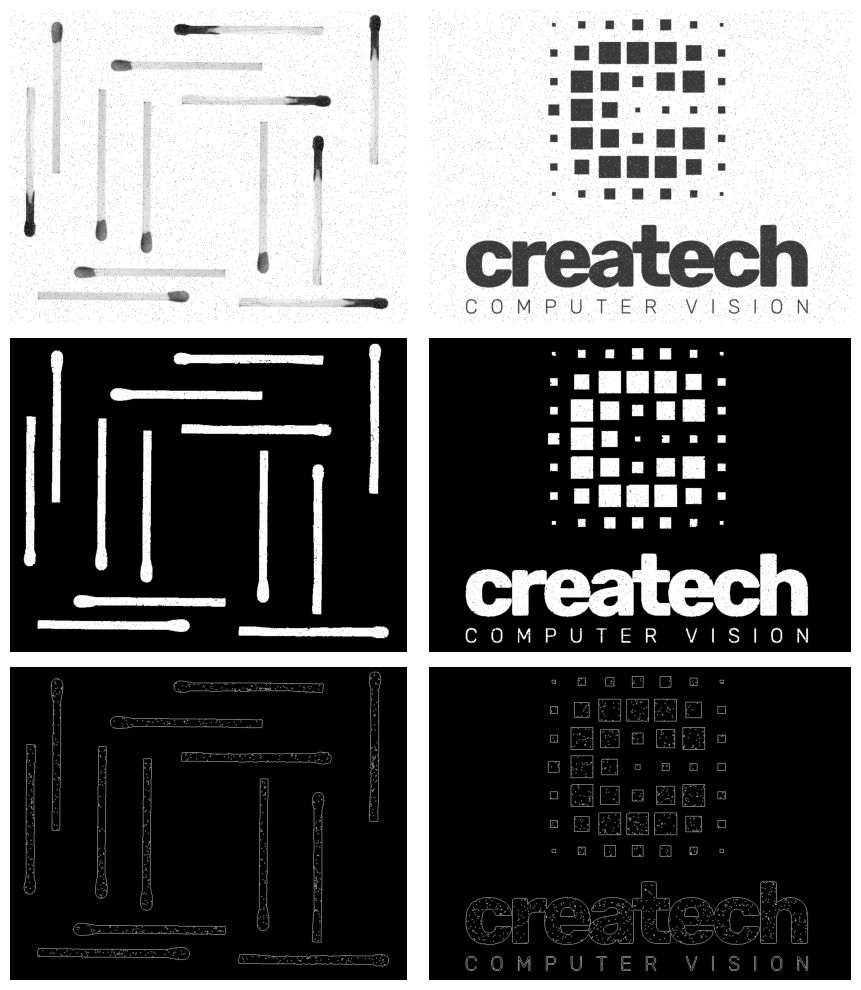

In [ ]:
EE = np.ones((3,3)).astype(np.uint8)
fosforos_apertura = cv.morphologyEx(fosforos_binario,cv.MORPH_OPEN,EE)
createch_apertura = cv.morphologyEx(createch_binario,cv.MORPH_OPEN,EE)

ee_cross = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
bordes_fosforos = fosforos_apertura - cv.erode(fosforos_apertura,ee_cross)
bordes_createch = createch_apertura - cv.erode(createch_apertura,ee_cross)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
ax[0,0].imshow(fosforos_ruido,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(createch_ruido,cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(fosforos_apertura,cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(createch_apertura,cmap='gray')
ax[1,1].axis('off')
ax[2,0].imshow(bordes_fosforos,cmap="gray")
ax[2,0].axis('off')
ax[2,1].imshow(bordes_createch,cmap='gray')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

Mejoró pero todavía no pudo sacar el ruido dentro de las letras o de las formas. Sí sacó el ruido fuera de las mismas.

## **Ejercicio 5:** Trabajos de aplicación

**1.** Obtenga el nombre completo, profesión y las siglas de la empresa a la que
pertenece la tarjeta personal de la imagen. Obtenga el tresto de la información en otra imagen.

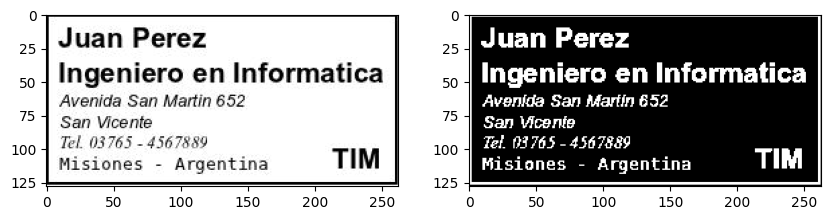

In [ ]:
tarjeta = cv.imread("drive/MyDrive/PDI/Tarjeta.jpeg",cv.IMREAD_GRAYSCALE)  # cargo imágen en escala de grises
_,tarjeta_binario = cv.threshold(tarjeta,200,255,cv.THRESH_BINARY_INV)    # umbralizo la imágen

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(tarjeta,cmap="gray")
ax[1].imshow(tarjeta_binario,cmap="gray")
plt.show()

> Comenzamos por hacer una apertura que nos permita obtener las letras grandes y despreciar las más pequeñas.

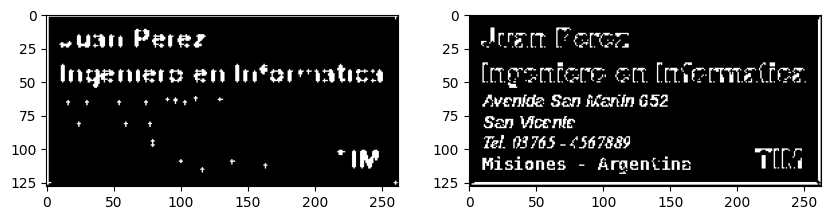

In [ ]:
EE = cv.getStructuringElement(cv.MORPH_CROSS,(4,4)) # utilizamos un EE de tipo CROSS (+) para capturar las letras
tarjeta_apertura1 = cv.morphologyEx(tarjeta_binario,cv.MORPH_OPEN,EE)

mask = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=tarjeta_apertura1) # aplicamos la máscara obtenida a la imágen binarizad
mask2 = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=255-tarjeta_apertura1) # para obtener el resto de las letras (las más chicas) hacemos la inversa de la máscara de las grandes
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(mask,cmap="gray")
ax[1].imshow(mask2,cmap="gray")
plt.show()

> Con una operación de apertura más nos deshacemos de los rastros de letras pequeñas que quedaron (los puntos abajo).

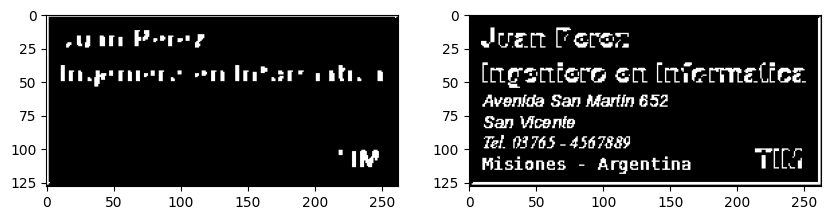

In [ ]:
EE = cv.getStructuringElement(cv.MORPH_RECT,(3,3))  # utilizamos un EE cuadrado
tarjeta_apertura2 = cv.morphologyEx(tarjeta_apertura1,cv.MORPH_OPEN,EE) # usamos operación de apertura para deshacernos de los puntos pequeños que quedaron de las letras chiquitas con la erosión y después volver las grandes con dilatación.

mask = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=tarjeta_apertura2) # aplicamos la máscara obtenida a la imágen binarizada
mask2 = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=255-tarjeta_apertura2)  # para obtener el resto de las letras (las más chicas) hacemos la inversa de la máscara de las grandes
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(mask,cmap="gray")
ax[1].imshow(mask2,cmap="gray")
plt.show()

> Hacemos una dilatación para poder reconstruir de a poco las letras, ya que ahora tenemos una noción de dónde está cada una.

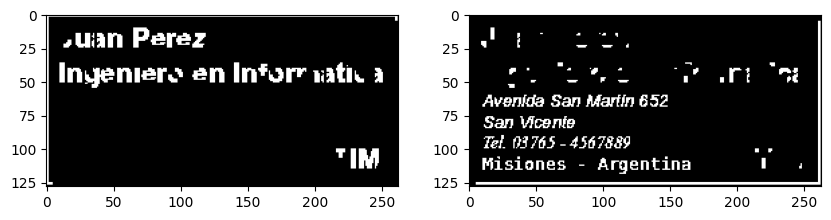

In [ ]:
EE = cv.getStructuringElement(cv.MORPH_RECT,(5,5))  # usamos un EE cuadrado, el kernel no tan grande para no obtener las de abajo que están cerca de, por ejemplo, la g de 'Ingeniero'
tarjeta_dilate1 = cv.morphologyEx(tarjeta_apertura2,cv.MORPH_DILATE,EE) # con dilatación obtenemos mejor las letras grandes

mask = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=tarjeta_dilate1) # aplicamos la máscara obtenida a la imágen binarizad
mask2 = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=255-tarjeta_dilate1) # para obtener el resto de las letras (las más chicas) hacemos la inversa de la máscara de las grandes
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(mask,cmap="gray")
ax[1].imshow(mask2,cmap="gray")
plt.show()

> Como todavía las letras no se ven del todo bien, volvemos a hacer una dilatación para devolverlas a su dimensión original.

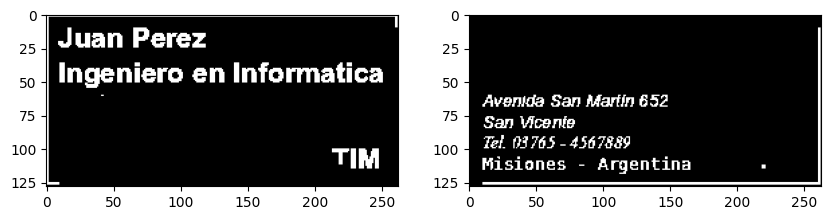

In [ ]:
EE = cv.getStructuringElement(cv.MORPH_RECT,(11,11))  # usamos un EE cuadrado cuyas dimensiones se ajustaron probando varios valores.
tarjeta_dilate2 = cv.morphologyEx(tarjeta_dilate1,cv.MORPH_DILATE,EE) # con dilatación devolvemos las letras a la dimensión original.

mask = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=tarjeta_dilate2) # aplicamos la máscara obtenida a la imágen binarizad
mask2 = cv.bitwise_and(tarjeta_binario,tarjeta_binario,mask=255-tarjeta_dilate2) # para obtener el resto de las letras (las más chicas) hacemos la inversa de la máscara de las grandes
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(mask,cmap="gray")
ax[1].imshow(mask2,cmap="gray")
plt.show()

> Viendo la imágen, vemos que las letras ya están en una dimensión adecuada y se pueden leer. El resultado no es óptimo, ya que algunas partes no se segmentan correctamente (como el segmento de la T en TIM), pero llega a un resultado decente para separar las letras más gruesas de las más delgadas.

2. Entre las m´ultiples facetas del “viejo de la teor´ıa”, se destaca la de m´usico prol´ıfico 1 y, como usted sabr´a, le gusta mucho la tecnolog´ıa.
Podr´a usted congraciarse con ´el y proveerle un programa que le permita extraer las notas musicales del pentagrama (notas01.png). El tema es Embrujo
de mi tierra, de Peteco Carabajal.


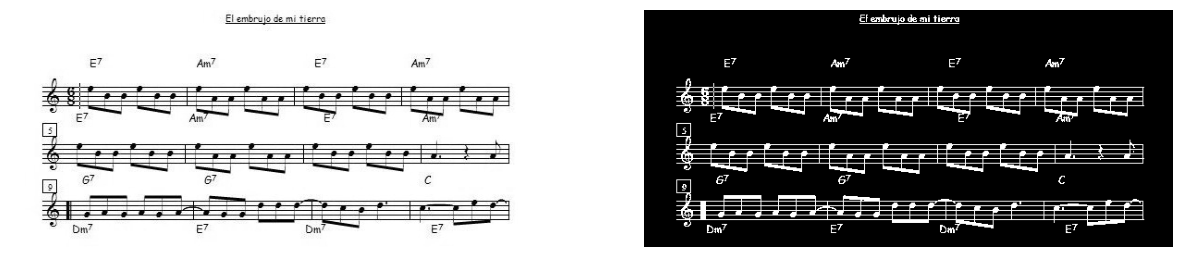

In [14]:
musica = cv.imread("drive/MyDrive/PDI/notas01.png",cv.IMREAD_GRAYSCALE)
_, musica_bin = cv.threshold(musica, 200, 255, cv.THRESH_BINARY_INV)

fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(musica,cmap='gray')
ax[0].axis('off')
ax[1].imshow(musica_bin,cmap='gray')
ax[1].axis('off')
plt.show()

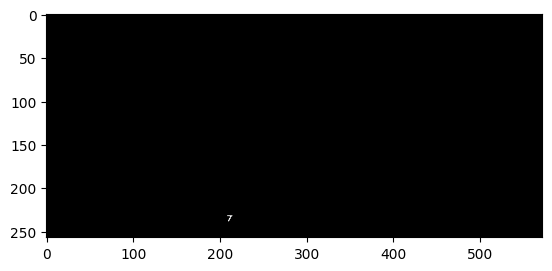

In [47]:
# Aplicar el algoritmo connectedComponents
num_labels, labels = cv.connectedComponents(musica_bin)

# Obtener las etiquetas únicas
unique_labels = np.unique(labels)

# Obtener cada componente por separado
components = []
for label in unique_labels:
    mask = np.uint8(labels == label)  # si pertenece al componente actual
    components.append(mask)

mask = cv.morphologyEx(musica_bin,cv.MORPH_OPEN,cv.getStructuringElement(cv.MORPH_RECT,(40,1)),iterations=1)

mask = cv.bitwise_not(mask)
notas = cv.bitwise_and(musica_bin,musica_bin,mask=mask)

plt.imshow(components[39],cmap="gray")
plt.show()

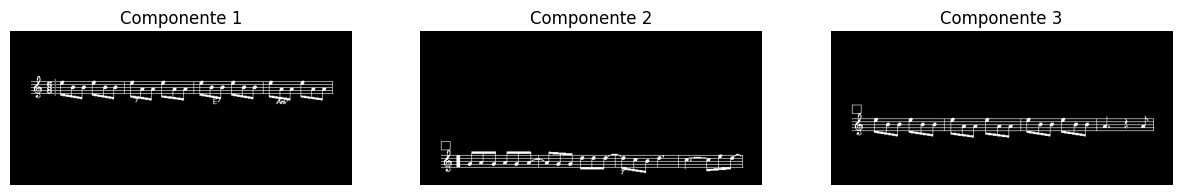

In [51]:
# Aplicar el algoritmo connectedComponents
num_labels, labels = cv.connectedComponents(musica_bin)

# Obtener las etiquetas únicas y sus áreas correspondientes
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Crear una lista de tuplas (label, area) para cada componente
component_areas = [(label, count) for label, count in zip(unique_labels, label_counts)]

# Ordenar la lista de componentes por área (en orden descendente)
component_areas.sort(key=lambda x: x[1], reverse=True)

# Obtener los tres componentes de mayor área
largest_components = component_areas[1:4]  # El primer componente es el fondo (área más grande)

# Crear una lista para almacenar las máscaras de los tres componentes de mayor área
largest_component_masks = []

# Iterar sobre los tres componentes de mayor área y obtener sus máscaras
for label, _ in largest_components:
    mask = np.uint8(labels == label)
    largest_component_masks.append(mask)

plt.figure(figsize=(15,15))
# Mostrar los tres componentes de mayor área
for i, mask in enumerate(largest_component_masks):
    plt.subplot(1, 3, i+1)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Componente {i+1}')
    plt.axis('off')

plt.show()

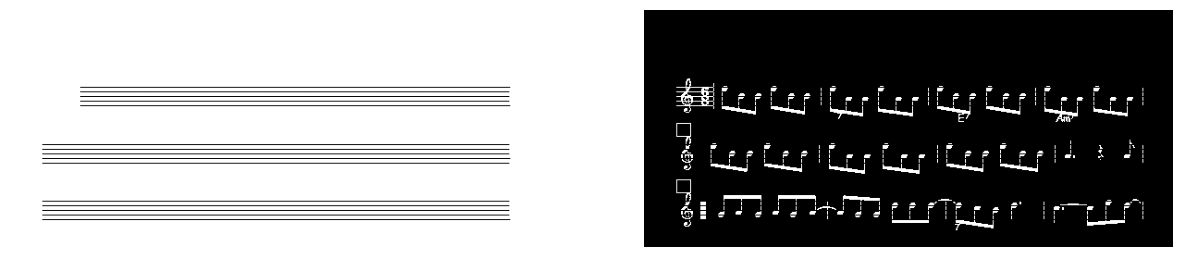

In [75]:
# Obtener una máscara con los tres componentes de mayor área
solo_notas = np.zeros_like(musica_bin,dtype=np.uint8)

for label, _ in largest_components:
    mask = np.uint8(labels == label)
    solo_notas += mask

mask_solo_notas = cv.morphologyEx(solo_notas,cv.MORPH_OPEN,cv.getStructuringElement(cv.MORPH_RECT,(45,1)),iterations=1)
mask_solo_notas = cv.bitwise_not(mask_solo_notas)
notas = cv.bitwise_and(solo_notas,mask_solo_notas)

fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(mask_solo_notas,cmap="gray")
ax[0].axis('off')
ax[1].imshow(notas,cmap='gray')
ax[1].axis('off')
plt.show()

 3. Se requiere eliminar todos aquellos gl´obulos rojos que est´en en contacto, directo o indirecto a trav´es de otro, con el borde. Utilice la imagen:

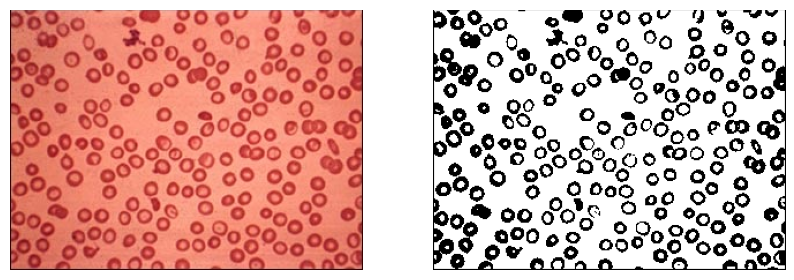

In [4]:
globulos = cv.imread("drive/MyDrive/PDI/Globulos Rojos.jpg")                 # cargo imagen a color
globulos_grises = cv.cvtColor(globulos, cv.COLOR_BGR2GRAY)
_,globulos_bin = cv.threshold(globulos_grises,120,255,cv.THRESH_BINARY)      # umbralizo la imágen

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(globulos[:,:,[2,1,0]],cmap='gray')
ax[0].axis('off')
ax[1].imshow(globulos_bin,cmap="gray")
ax[1].axis('off')
plt.show()

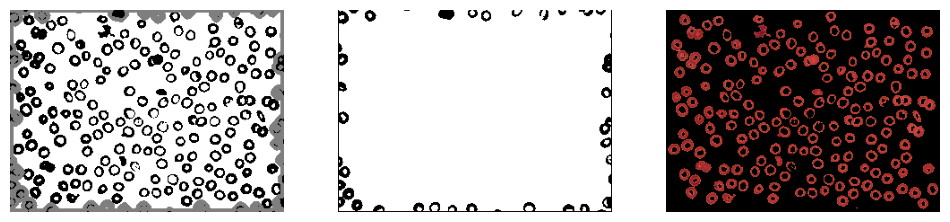

In [74]:
globulos_contornos = globulos_bin.copy()
contours, _ = cv.findContours(globulos_bin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # detecta sólo los contornos del borde con RETR_EXTERNAL
                                                                                      # si pongo RETR_LIST me detecta todos los glóbulos

mask = np.zeros(globulos_bin.shape, np.uint8)
for contour in contours:
  cv.drawContours(mask, [contour], -1, 255, thickness=cv.FILLED)
  cv.drawContours(globulos_contornos, [contour], -1, 127, thickness=4)

globulos_mask = cv.subtract(mask,globulos_bin)  # mask tiene los glóbulos que tocan el borde, se lo resto a la imagen binaria y tengo mi máscara para la img original
globulos_bien = cv.bitwise_and(globulos,globulos,mask=globulos_mask)  # aplico la máscara con sólo los que están en el medio, sin tocar el borde.

fig, ax = plt.subplots(1,3,figsize=(12,12))
ax[0].imshow(globulos_contornos,cmap='gray')
ax[0].axis('off')
ax[1].imshow(mask,cmap='gray')
ax[1].axis('off')
ax[2].imshow(globulos_bien[:,:,[2,1,0]])
ax[2].axis('off')
plt.show()

4. Utilizando la imagen satelital Rio.jpeg,
genere una m´ascara binaria con el r´ıo de la Plata y sus mayores afluentes,
utilizando la m´ascara obtenga la informaci´on de la imagen original,
obtenga el contorno de los r´ıos

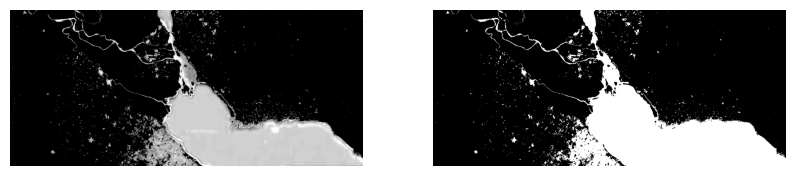

In [136]:
rio = cv.imread("drive/MyDrive/PDI/Rio.jpeg")  # cargo imágen a color
rio_azul,_,_ = cv.split(rio)  # sacamos azul para obtener sólo la parte del rio, el agua
_,rio_bin = cv.threshold(rio_azul,120,255,cv.THRESH_BINARY)  # umbralizo la imágen

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(rio_mask,cmap='gray')
ax[0].axis('off')
ax[1].imshow(rio_bin,cmap="gray")
ax[1].axis('off')
plt.show()

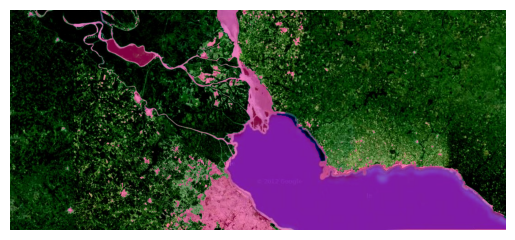

In [138]:
rio_contornos = rio.copy()

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
rio_cierre = cv.morphologyEx(rio_bin, cv.MORPH_CLOSE, kernel)   # operración de cierre para cubrir huecos entre regiones que deberían conectarse
contours, _ = cv.findContours(rio_cierre, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

aux = rio_contornos.copy()
cv.drawContours(aux, contours, -1, (127, 0, 255), thickness=cv.FILLED)
alpha = 0.5 # para dibujar arriba con transparencia los ríos
rio_contornos = cv.addWeighted(aux, alpha, rio_contornos, 1 - alpha, 0)

plt.imshow(rio_contornos[:,:,[2,1,0]])
plt.axis('off')
plt.show()

5. Encuentre y grafique la envoltura convexa del melanoma.
Puede implementar el método basado en morfología matemática, o
Utilizar el de OpenCV (algoritmo de Jack Sklansky): cv.convexHull()


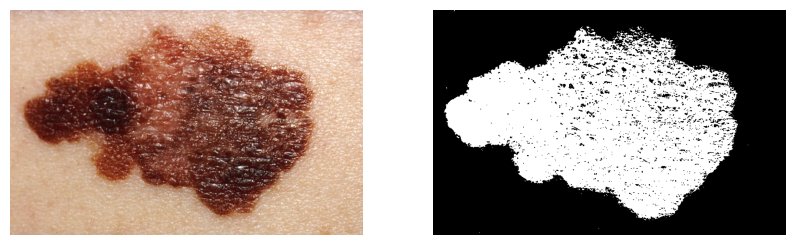

In [36]:
melanoma = cv.imread("drive/MyDrive/PDI/Melanoma.jpg")  # cargo imágen en escala de grises
melanoma_grises = cv.cvtColor(melanoma, cv.COLOR_BGR2GRAY)
_,melanoma_bin = cv.threshold(melanoma_grises,150,255,cv.THRESH_BINARY_INV)        # umbralizo la imágen (invertido)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(melanoma[:,:,[2,1,0]])
ax[0].axis('off')
ax[1].imshow(melanoma_bin,cmap="gray")
ax[1].axis('off')
plt.show()

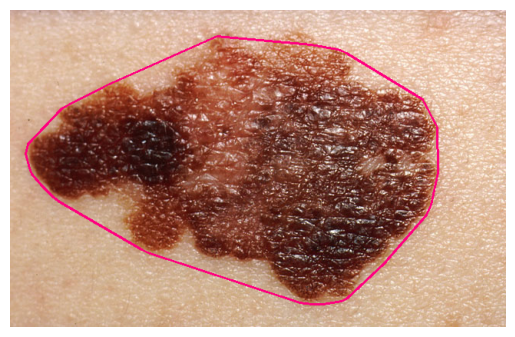

In [37]:
contours, _ = cv.findContours(melanoma_bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv.contourArea)
hull = cv.convexHull(max_contour)
cv.drawContours(melanoma, [hull], 0, (127, 0, 255), 2)

plt.imshow(melanoma[:,:,[2,1,0]])
plt.axis('off')
plt.show()

6. Encuentre los esqueletos de los cuerpos presentes en la imagen.
Alternativamente, puede aproximarlos mediante el afinamiento de las formas.

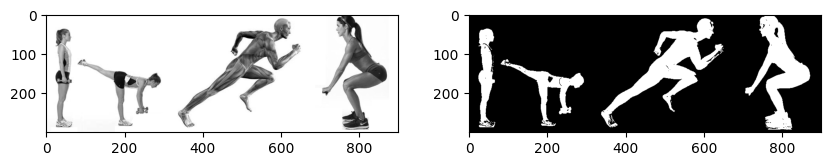

In [13]:
cuerpos = cv.imread("drive/MyDrive/PDI/Cuerpos.jpg",cv.IMREAD_GRAYSCALE)  # cargo imágen en escala de grises
_,cuerpos_bin = cv.threshold(cuerpos,200,255,cv.THRESH_BINARY_INV)        # umbralizo la imágen (invertido)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cuerpos,cmap="gray")
ax[1].imshow(cuerpos_bin,cmap="gray")
plt.show()

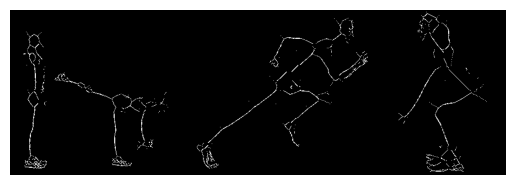

In [14]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3)) # elemento estructurante
skeleton = np.zeros(cuerpos_bin.shape, np.uint8)         # inicializo imagen para esqueleto

# usamos el algoritmo de esqueletización para lograr esto
while True:
    eroded = cv.erode(cuerpos_bin, kernel)   # erosión para achicar siluetas
    temp = cv.dilate(eroded, kernel)         # dilatación expande lo que quedó de la silueta
    temp = cv.subtract(cuerpos_bin, temp)    # Restamos la dilatación de la imagen original: deja sólo bordes internos de las partes blancas.
    skeleton = cv.bitwise_or(skeleton, temp) # Añadimos los píxeles restantes al esqueleto
    cuerpos_bin = eroded.copy()              # Próxima iteración hace lo mismo pero con la silueta achicada hasta que no queden partes de la silueta.

    if cv.countNonZero(cuerpos_bin) == 0:    # Si no hay más píxeles para erosionar en la imagen binarizada, terminó el algoritmo.
        break

plt.imshow(skeleton,cmap='gray')
plt.axis('off')
plt.show()